# Final Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class RegresionLogistica_con_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, solver = 'newton-cg')#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

## Importing the data

In [12]:
X_train = pd.read_csv("X_train.csv", index_col=0)

In [13]:
X_test = pd.read_csv("X_test.csv", index_col=0)

In [14]:
y_train = pd.read_csv("y_train.csv", index_col=0)

In [15]:
y_test = pd.read_csv("y_test.csv", index_col=0)

# Training the model

In [27]:
X_train = X_train.loc[:, [#"Account_check_status_first2",
                           "Account_check_status_last2",
                           #"Credit_history_team1",
                           "Credit_history_team2",
                           "Credit_history_critical account/ other credits existing (not at this bank)",
                           #"Purpose_vacation_forniture_education",
                           "Purpose_car (new)",
                           "Purpose_business",
                           "Purpose_radio/television",
                           "Purpose_domestic appliances",
                           "Purpose_repairs_carUsed_retraining",
                           #"Savings_... < 100 DM",
                           "Savings_100 <= ... < 500 DM",
                           "Savings_500 <= ... < 1000 DM ",
                           "Savings_unknown/ no savings account",
                           "Savings_.. >= 1000 DM ",
                           #"Present_emp_since_unemployed_less1",
                           "Present_emp_since_1 <= ... < 4 years",
                           "Present_emp_since_.. >= 7 years",
                           "Present_emp_since_4 <= ... < 7 years",
                           #"Personal_status_sex_male : divorced/separated",
                           "Personal_status_sex_female : divorced/separated/married",
                           "Personal_status_sex_male : married/widowed",
                           "Personal_status_sex_male : single",
                           # "Other_debtors_co-applicant",
                           # "Other_debtors_none",
                           # "Other_debtors_guarantor",
                           # "Property_unknown / no property",
                           # "Property_middle",
                           # "Property_real estate",
                           #"Other_installment_plans_stores_bank",
                           "Other_installment_plans_none",
                           # "Housing_free_rent",
                           # "Housing_own",
                           # "Job_management/ self-employed/ highly qualified employee/ officer",
                           # "Job_skilled employee / official",
                           # "Job_unemployed_unskilled",
                           # "Telephone_none",
                           # "Telephone_yes, registered under the customers name ",
                           # "Foreign_worker_yes",
                           # "Foreign_worker_no",
                           # "People_under_maintenance_2",
                           # "People_under_maintenance_1",
                           # "Credits_this_bank_1",
                           # "Credits_this_bank_2",
                           # "Credits_this_bank_3",
                           # "Credits_this_bank_4",
                           # "Age_1",
                           # "Age_2",
                           # "Age_3",
                           # "Age_4",
                           # "Age_5",
                           # "Age_6",
                           # "Duration_in_month_1",
                           # "Duration_in_month_2",
                           # "Duration_in_month_3",
                           # "Duration_in_month_4",
                           # "Duration_in_month_5",
                           "Credit_amount_1",
                           "Credit_amount_2",
                           #"Credit_amount_3",
                           "Installment_as_income_perc_1",
                           "Installment_as_income_perc_2",
                           "Installment_as_income_perc_3",
                           #"Installment_as_income_perc_4",
                           "Present_res_since_1",
                           #"Present_res_since_2",
                           "Present_res_since_3",
                           "Present_res_since_4"]]

In [25]:
categorias_referencia = ["Account_check_status_first2",
                         "Credit_history_team1",
                         "Purpose_vacation_forniture_education",
                         "Savings_... < 100 DM",
                         "Present_emp_since_unemployed_less1",
                         "Personal_status_sex_male : divorced/separated",
                         #"Other_debtors_co-applicant",
                         #"Property_unknown / no property",
                         "Other_installment_plans_stores_bank",
                         #"Housing_free_rent",
                         #"Job_management/ self-employed/ highly qualified employee/ officer",
                         #"Telephone_none",
                         #"Foreign_worker_yes",
                         #"People_under_maintenance_1",
                         #"Credits_this_bank_4",
                         #"Age_1",
                         #"Duration_in_month_4"]
                         "Credit_amount_3"
                         "Installment_as_income_perc_4"
                         "Present_res_since_2"]

In [29]:
regresion2 = LogisticRegression(solver='newton-cg')

In [30]:
regresion2_p_values = RegresionLogistica_con_p_values()

In [31]:
regresion2.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
regresion2_p_values.fit(X_train, y_train.values.ravel())

In [33]:
nombres_var_independientes = X_train.columns.values
tabla_resultados = pd.DataFrame(columns = ["Variable Independiente"], data=nombres_var_independientes)
tabla_resultados["Coeficientes"] = np.transpose(regresion2.coef_)
tabla_resultados.index = tabla_resultados.index + 1 
tabla_resultados.loc[0] = ["Intercept", regresion2.intercept_[0]]
tabla_resultados = tabla_resultados.sort_index()
p_values = regresion2_p_values.p_values
p_values = np.append(np.nan, np.array(p_values))
tabla_resultados['p_values'] = p_values

In [34]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercept,-3.854813,NaN
1,Account_check_status_last2,1.311125,2.985835e-12
2,Credit_history_team2,0.625940,2.112054e-02
3,Credit_history_critical account/ other credits...,1.381755,1.022432e-05
4,Purpose_car (new),-0.194120,5.182424e-01
5,Purpose_business,0.347179,3.317076e-01
6,Purpose_radio/television,0.287699,3.596096e-01
7,Purpose_domestic appliances,0.547694,7.277841e-02
8,Purpose_repairs_carUsed_retraining,1.138775,2.582450e-03
9,Savings_100 <= ... < 500 DM,0.285585,3.030649e-01


# Validate the Model

In [37]:
X_test = X_test.loc[:, [#"Account_check_status_first2",
                           "Account_check_status_last2",
                           #"Credit_history_team1",
                           "Credit_history_team2",
                           "Credit_history_critical account/ other credits existing (not at this bank)",
                           #"Purpose_vacation_forniture_education",
                           "Purpose_car (new)",
                           "Purpose_business",
                           "Purpose_radio/television",
                           "Purpose_domestic appliances",
                           "Purpose_repairs_carUsed_retraining",
                           #"Savings_... < 100 DM",
                           "Savings_100 <= ... < 500 DM",
                           "Savings_500 <= ... < 1000 DM ",
                           "Savings_unknown/ no savings account",
                           "Savings_.. >= 1000 DM ",
                           #"Present_emp_since_unemployed_less1",
                           "Present_emp_since_1 <= ... < 4 years",
                           "Present_emp_since_.. >= 7 years",
                           "Present_emp_since_4 <= ... < 7 years",
                           #"Personal_status_sex_male : divorced/separated",
                           "Personal_status_sex_female : divorced/separated/married",
                           "Personal_status_sex_male : married/widowed",
                           "Personal_status_sex_male : single",
                           # "Other_debtors_co-applicant",
                           # "Other_debtors_none",
                           # "Other_debtors_guarantor",
                           # "Property_unknown / no property",
                           # "Property_middle",
                           # "Property_real estate",
                           #"Other_installment_plans_stores_bank",
                           "Other_installment_plans_none",
                           # "Housing_free_rent",
                           # "Housing_own",
                           # "Job_management/ self-employed/ highly qualified employee/ officer",
                           # "Job_skilled employee / official",
                           # "Job_unemployed_unskilled",
                           # "Telephone_none",
                           # "Telephone_yes, registered under the customers name ",
                           # "Foreign_worker_yes",
                           # "Foreign_worker_no",
                           # "People_under_maintenance_2",
                           # "People_under_maintenance_1",
                           # "Credits_this_bank_1",
                           # "Credits_this_bank_2",
                           # "Credits_this_bank_3",
                           # "Credits_this_bank_4",
                           # "Age_1",
                           # "Age_2",
                           # "Age_3",
                           # "Age_4",
                           # "Age_5",
                           # "Age_6",
                           # "Duration_in_month_1",
                           # "Duration_in_month_2",
                           # "Duration_in_month_3",
                           # "Duration_in_month_4",
                           # "Duration_in_month_5",
                           "Credit_amount_1",
                           "Credit_amount_2",
                           #"Credit_amount_3",
                           "Installment_as_income_perc_1",
                           "Installment_as_income_perc_2",
                           "Installment_as_income_perc_3",
                           #"Installment_as_income_perc_4",
                           "Present_res_since_1",
                           #"Present_res_since_2",
                           "Present_res_since_3",
                           "Present_res_since_4"]]

In [39]:
prediccion_y = regresion2.predict(X_test)

In [40]:
probabilidad_y = regresion2.predict_proba(X_test)

In [41]:
probabilidad_bueno = probabilidad_y[:, 1]

In [42]:
# real values
valores_reales = y_test

In [44]:
valores_reales.reset_index(drop=True, inplace=True)

In [45]:
df_prediccion = pd.concat([valores_reales, pd.DataFrame(probabilidad_bueno)], axis=1)

In [47]:
df_prediccion.head()

,default,0
0,1,0.671759
1,0,0.667230
2,1,0.419237
3,1,0.953556
4,0,0.388094


In [48]:
df_prediccion.columns = ["Real", "Probabilidad_Prediccion"]

In [49]:
df_prediccion.head()

,Real,Probabilidad_Prediccion
0,1,0.671759
1,0,0.667230
2,1,0.419237
3,1,0.953556
4,0,0.388094


In [50]:
df_prediccion.index = X_test.index

In [51]:
df_prediccion.head(3)

,Real,Probabilidad_Prediccion
890,1,0.671759
983,0,0.667230
107,1,0.419237


# How good is our model?

In [69]:
punto_de_corte = 0.5

In [70]:
df_prediccion["Prediccion"] = np.where(df_prediccion["Probabilidad_Prediccion"] > punto_de_corte, 1, 0)

In [71]:
df_prediccion

,Real,Probabilidad_Prediccion,Prediccion
890,1,0.671759,1
983,0,0.667230,1
107,1,0.419237,0
609,1,0.953556,1
113,0,0.388094,0
...,...,...,...
681,1,0.950177,1
63,0,0.231612,0
152,1,0.784721,1
498,1,0.492762,0


In [72]:
pd.crosstab(df_prediccion["Real"], df_prediccion["Prediccion"], rownames=["Valores Reales"], colnames=["Predicciones"])

Predicciones,0,1
Valores Reales,,
0,12,21
1,7,60


> True Positive - 60

> False Positive - 21

> True Negative - 12

> False Negative - 7

In [73]:
pd.crosstab(df_prediccion["Real"], df_prediccion["Prediccion"], rownames=["Valores Reales"], colnames=["Predicciones"]) / df_prediccion.shape[0]

Predicciones,0,1
Valores Reales,,
0,0.12,0.21
1,0.07,0.60


# ROC y AUC

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

In [84]:
roc_curve(df_prediccion["Real"], df_prediccion["Probabilidad_Prediccion"])

(array([0.        , 0.        , 0.        , 0.03030303, 0.03030303,
        0.06060606, 0.06060606, 0.09090909, 0.09090909, 0.12121212,
        0.12121212, 0.15151515, 0.15151515, 0.18181818, 0.18181818,
        0.21212121, 0.21212121, 0.27272727, 0.27272727, 0.3030303 ,
        0.3030303 , 0.33333333, 0.33333333, 0.36363636, 0.36363636,
        0.45454545, 0.45454545, 0.48484848, 0.48484848, 0.54545455,
        0.54545455, 0.60606061, 0.60606061, 0.63636364, 0.63636364,
        0.66666667, 0.66666667, 0.81818182, 0.81818182, 0.87878788,
        0.87878788, 1.        ]),
 array([0.        , 0.01492537, 0.08955224, 0.08955224, 0.2238806 ,
        0.2238806 , 0.43283582, 0.43283582, 0.46268657, 0.46268657,
        0.50746269, 0.50746269, 0.6119403 , 0.6119403 , 0.67164179,
        0.67164179, 0.70149254, 0.70149254, 0.71641791, 0.71641791,
        0.74626866, 0.74626866, 0.7761194 , 0.7761194 , 0.79104478,
        0.79104478, 0.82089552, 0.82089552, 0.8358209 , 0.8358209 ,
        0.8805

In [85]:
falsos_positivos, verdaderos_positivos, puntos_de_corte = roc_curve(df_prediccion["Real"], df_prediccion["Probabilidad_Prediccion"])

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Curva ROC')

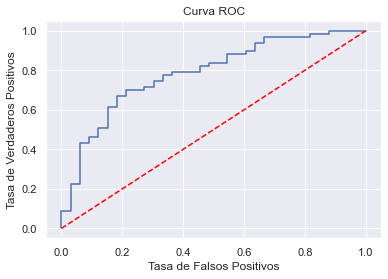

In [88]:
plt.plot(falsos_positivos, verdaderos_positivos)
plt.plot(falsos_positivos, falsos_positivos, linestyle='--', color='red')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")

In [89]:
AUC = roc_auc_score(df_prediccion["Real"], df_prediccion["Probabilidad_Prediccion"])

In [90]:
AUC

0.7856173677069199

# Gini & Kolmogorov-Smirnov

In [91]:
df_prediccion = df_prediccion.sort_values("Probabilidad_Prediccion")

In [94]:
df_prediccion = df_prediccion.reset_index()

In [96]:
df_prediccion["Numero_acumulado_de_clientes"] = df_prediccion.index + 1

In [97]:
df_prediccion["Numero_acumulado_de_clientes_buenos"] = df_prediccion["Real"].cumsum() 

In [98]:
df_prediccion["Numero_acumulado_de_clientes_malos"] = df_prediccion["Numero_acumulado_de_clientes"] - df_prediccion["Numero_acumulado_de_clientes_buenos"]

In [99]:
df_prediccion["% Acumulado Clientes"] = df_prediccion["Numero_acumulado_de_clientes"] / df_prediccion.shape[0]

In [100]:
df_prediccion["% Acumulado Clientes Buenos"]  = df_prediccion["Numero_acumulado_de_clientes_buenos"] / df_prediccion["Real"].sum()

In [101]:
df_prediccion["% Acumulado Clientes Malos"] = df_prediccion["Numero_acumulado_de_clientes_malos"] / (df_prediccion.shape[0] - df_prediccion["Real"].sum())

In [102]:
df_prediccion.head()

,index,Real,Probabilidad_Prediccion,Prediccion,Monto,Numero_acumulado_de_clientes,Numero_acumulado_de_clientes_buenos,Numero_acumulado_de_clientes_malos,% Acumulado Clientes,% Acumulado Clientes Buenos,% Acumulado Clientes Malos
0,131,0,0.194097,0,6887,1,0,1,0.01,0.000000,0.030303
1,63,0,0.231612,0,14421,2,0,2,0.02,0.000000,0.060606
2,548,0,0.256039,0,626,3,0,3,0.03,0.000000,0.090909
3,958,0,0.269482,0,4006,4,0,4,0.04,0.000000,0.121212
4,954,1,0.330437,0,1893,5,1,4,0.05,0.014925,0.121212


Text(0.5, 1.0, 'Curva de Gini')

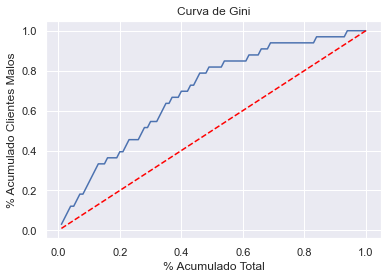

In [105]:
plt.plot(df_prediccion["% Acumulado Clientes"], df_prediccion["% Acumulado Clientes Malos"])
plt.plot(df_prediccion["% Acumulado Clientes"], df_prediccion["% Acumulado Clientes"], linestyle='--', color='red')
plt.xlabel("% Acumulado Total")
plt.ylabel("% Acumulado Clientes Malos")
plt.title("Curva de Gini")

In [107]:
Gini = AUC*2 - 1 
Gini

0.5712347354138398

Text(0.5, 1.0, 'Kolgomorov-Smirnov')

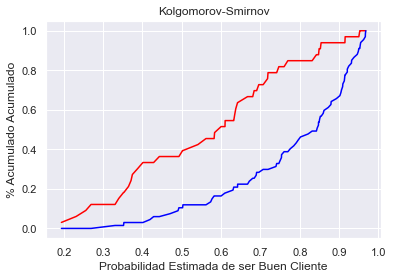

In [108]:
plt.plot(df_prediccion['Probabilidad_Prediccion'], df_prediccion['% Acumulado Clientes Malos'], color = 'red')
plt.plot(df_prediccion['Probabilidad_Prediccion'], df_prediccion['% Acumulado Clientes Buenos'], color = 'blue')
plt.xlabel('Probabilidad Estimada de ser Buen Cliente')
plt.ylabel('% Acumulado Acumulado')
plt.title('Kolgomorov-Smirnov')

In [109]:
Coef_KS = max(df_prediccion["% Acumulado Clientes Malos"] - df_prediccion["% Acumulado Clientes Buenos"])
Coef_KS

0.48982360922659435